In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | new norfolk
Processing Record 2 of Set 13 | ushuaia
Processing Record 3 of Set 13 | vaini
Processing Record 4 of Set 13 | bonthe
Processing Record 5 of Set 13 | provideniya
Processing Record 6 of Set 13 | digras
Processing Record 7 of Set 13 | rikitea
Processing Record 8 of Set 13 | san cristobal
Processing Record 9 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 13 | mataura
Processing Record 11 of Set 13 | hithadhoo
Processing Record 12 of Set 13 | energetik
Processing Record 13 of Set 13 | peterhead
Processing Record 14 of Set 13 | busselton
Processing Record 15 of Set 13 | cidreira
Processing Record 16 of Set 13 | kitimat
Processing Record 17 of Set 13 | adrar
Processing Record 18 of Set 13 | tasiilaq
Processing Record 19 of Set 13 | nhulunbuy
Processing Record 20 of Set 13 | honghu
Processing Record 21 of Set 13 | port keats
Processing Record 22 of Set 13 | i

Processing Record 33 of Set 16 | flinders
Processing Record 34 of Set 16 | kasama
Processing Record 35 of Set 16 | kruisfontein
Processing Record 36 of Set 16 | lolua
City not found. Skipping...
Processing Record 37 of Set 16 | bargal
City not found. Skipping...
Processing Record 38 of Set 16 | naze
Processing Record 39 of Set 16 | zenzeli
Processing Record 40 of Set 16 | halalo
City not found. Skipping...
Processing Record 41 of Set 16 | buraydah
Processing Record 42 of Set 16 | kjollefjord
Processing Record 43 of Set 16 | almaznyy
Processing Record 44 of Set 16 | portland
Processing Record 45 of Set 16 | haibowan
City not found. Skipping...
Processing Record 46 of Set 16 | samagaltay
Processing Record 47 of Set 16 | gorontalo
Processing Record 48 of Set 16 | arlit
Processing Record 49 of Set 16 | halifax
Processing Record 50 of Set 16 | omboue
Processing Record 1 of Set 17 | saskylakh
Processing Record 2 of Set 17 | qaanaaq
Processing Record 3 of Set 17 | chuy
Processing Record 4 of 

Processing Record 19 of Set 20 | abu ghosh
Processing Record 20 of Set 20 | kandrian
Processing Record 21 of Set 20 | nanortalik
Processing Record 22 of Set 20 | gamba
Processing Record 23 of Set 20 | okato
Processing Record 24 of Set 20 | west wendover
Processing Record 25 of Set 20 | port blair
Processing Record 26 of Set 20 | keti bandar
Processing Record 27 of Set 20 | amderma
City not found. Skipping...
Processing Record 28 of Set 20 | koslan
Processing Record 29 of Set 20 | hervey bay
Processing Record 30 of Set 20 | pilar
Processing Record 31 of Set 20 | clyde river
Processing Record 32 of Set 20 | richards bay
Processing Record 33 of Set 20 | salto
Processing Record 34 of Set 20 | kudahuvadhoo
Processing Record 35 of Set 20 | deputatskiy
Processing Record 36 of Set 20 | pekalongan
Processing Record 37 of Set 20 | suraabad
Processing Record 38 of Set 20 | skelleftea
Processing Record 39 of Set 20 | las palmas
Processing Record 40 of Set 20 | christchurch
Processing Record 41 of 

Processing Record 7 of Set 24 | kadykchan
City not found. Skipping...
Processing Record 8 of Set 24 | henties bay
Processing Record 9 of Set 24 | todos santos
Processing Record 10 of Set 24 | galgani
City not found. Skipping...
Processing Record 11 of Set 24 | bowen
Processing Record 12 of Set 24 | hualmay
Processing Record 13 of Set 24 | mayo
Processing Record 14 of Set 24 | taoudenni
Processing Record 15 of Set 24 | axim
Processing Record 16 of Set 24 | ust-nera
Processing Record 17 of Set 24 | saldanha
Processing Record 18 of Set 24 | udachnyy
Processing Record 19 of Set 24 | wilmington
Processing Record 20 of Set 24 | viedma
Processing Record 21 of Set 24 | touros
Processing Record 22 of Set 24 | san miguel
Processing Record 23 of Set 24 | meiganga
Processing Record 24 of Set 24 | hay river
Processing Record 25 of Set 24 | bossembele
City not found. Skipping...
Processing Record 26 of Set 24 | yaguajay
Processing Record 27 of Set 24 | swan river
Processing Record 28 of Set 24 | yer

In [2]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

NameError: name 'pd' is not defined

In [1]:
city_data_df.to_csv('WeatherPy_data.csv')

NameError: name 'city_data_df' is not defined

In [12]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2022-01-20 16:48:54,-42.7826,147.0587,55.71,70,11,2.98
1,Ushuaia,AR,2022-01-20 16:48:55,-54.8000,-68.3000,62.26,45,0,3.44
2,Vaini,TO,2022-01-20 16:48:55,-21.2000,-175.2000,81.72,78,7,19.33
3,Bonthe,SL,2022-01-20 16:48:55,7.5264,-12.5050,84.61,61,82,13.09
4,Provideniya,RU,2022-01-20 16:48:56,64.3833,-173.3000,-12.46,89,13,4.65


In [15]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        582 non-null    object 
 1   Country     582 non-null    object 
 2   Date        582 non-null    object 
 3   Lat         582 non-null    float64
 4   Lng         582 non-null    float64
 5   Max Temp    582 non-null    float64
 6   Humidity    582 non-null    int64  
 7   Cloudiness  582 non-null    int64  
 8   Wind Speed  582 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 41.0+ KB


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime('%Y-%m-%d %H:%M:%S')
today

'2022-01-20 11:24:42'

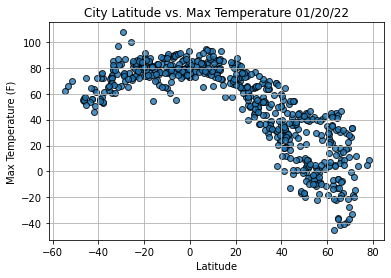

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

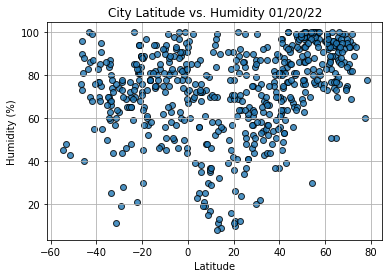

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

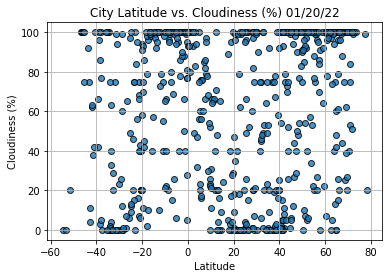

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

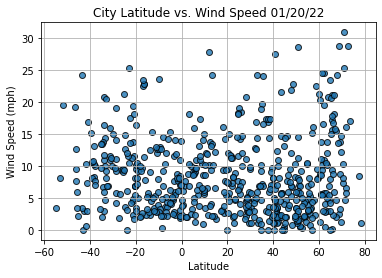

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                     Cidreira
Country                        BR
Date          2022-01-20 16:48:59
Lat                      -30.1811
Lng                      -50.2056
Max Temp                    83.25
Humidity                       74
Cloudiness                     23
Wind Speed                   10.0
Name: 13, dtype: object

In [26]:
city_data_df[(city_data_df['Lat'] >= 0)].head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Bonthe,SL,2022-01-20 16:48:55,7.5264,-12.5050,84.61,61,82,13.09
4,Provideniya,RU,2022-01-20 16:48:56,64.3833,-173.3000,-12.46,89,13,4.65
5,Digras,IN,2022-01-20 16:48:56,20.1167,77.7167,72.28,36,1,5.08
7,San Cristobal,VE,2022-01-20 16:48:57,7.7669,-72.2250,75.38,48,97,7.00
10,Energetik,RU,2022-01-20 16:48:58,51.7445,58.7934,2.43,98,100,0.40


In [27]:
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]

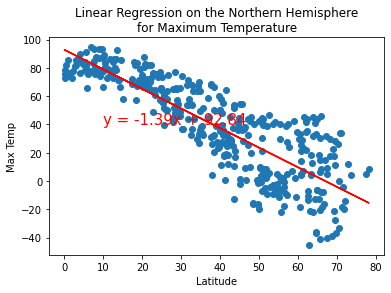

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))

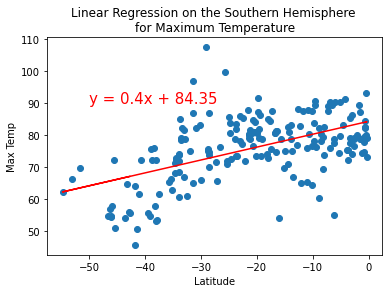

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

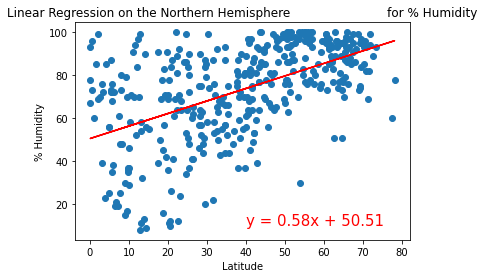

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

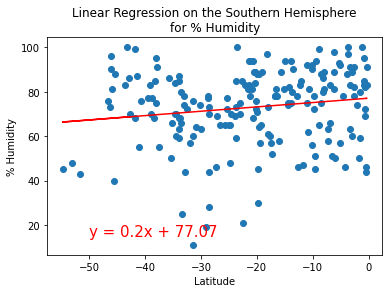

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-50,15))

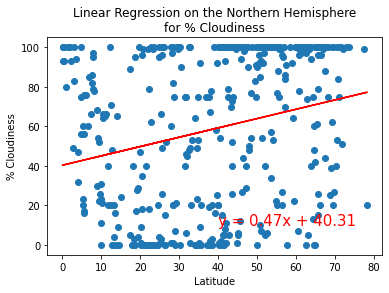

In [32]:
# SKILL DRILL: 6.4.4
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(40,10))

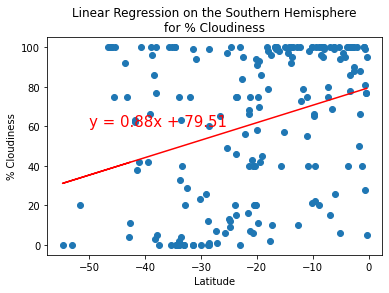

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-50,60))

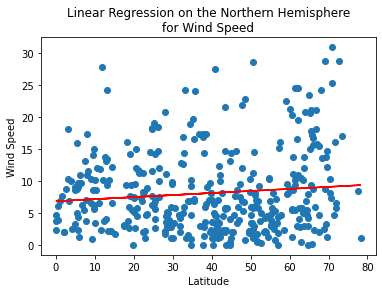

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(40,35))

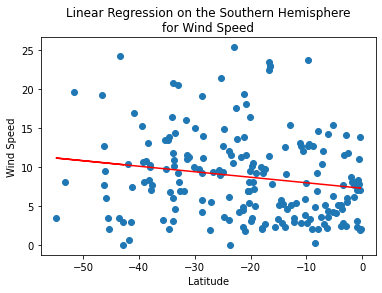

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-50,35))

In [36]:
# Import the dependencies.
import pandas as pd
import gmaps
import gmaps.datasets
import requests
# Import the API key.
from config import g_key

In [37]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,New Norfolk,AU,2022-01-20 16:48:54,-42.7826,147.0587,55.71,70,11,2.98
1,1,Ushuaia,AR,2022-01-20 16:48:55,-54.8000,-68.3000,62.26,45,0,3.44
2,2,Vaini,TO,2022-01-20 16:48:55,-21.2000,-175.2000,81.72,78,7,19.33
3,3,Bonthe,SL,2022-01-20 16:48:55,7.5264,-12.5050,84.61,61,82,13.09
4,4,Provideniya,RU,2022-01-20 16:48:56,64.3833,-173.3000,-12.46,89,13,4.65


In [38]:
city_data_df.count()

City_ID       582
City          582
Country       576
Date          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
dtype: int64

In [39]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object